In [ ]:
import nltk
import re
import Sastrawi
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
data = pd.read_csv('pemilu24.csv')
data1 = pd.read_csv('pemilu24.csv')

In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data1

,created_at,full_text,processed_text
0,06/05/23,#PemiluSerentak2024\n#Pemilu2024SesuaiTahapan\...,pemiluserentak2024npemilu2024sesuaitahapanntol...
1,06/05/23,AHY Minta Demokat Wilayah Papua Selatan Tetap ...,ahy demokat wilayah papua selatan solid menang...
2,06/05/23,Hari ini @PDemokrat resmi mendaftar ke KPU. Di...,pdemokrat resmi daftar kpu milu 2024 lupa pili...
3,06/05/23,Mari kita jaga Penyelenggaraan Pemilu 2024 aga...,mari jaga selenggara milu 2024 jalan aman dama...
4,06/05/23,Mari kita jaga Penyelenggaraan Pemilu 2024 aga...,mari jaga selenggara milu 2024 jalan aman dama...
...,...,...,...
996,06/04/23,Ini Target Partai Golkar di Pemilu 2024 Raih 2...,target partai golkar milu 2024 raih 20 persen ...
997,06/04/23,@refaabdi Sukseskan pemilu 2024,refaabdi sukses milu 2024
998,06/04/23,@alextham878 Batalnya piala dunia U 20 di Indo...,alextham878 batal piala dunia u 20 indonesia s...
999,06/04/23,(04/06)\n\nSelamat Hari Raya Waisak 2023 / 256...,0406nnselamat raya waisak 2023 2567 bennmoment...


In [ ]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Mendefinisikan fungsi untuk memproses teks
def process_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()

    # Menghapus link atau URL
    text = re.sub(r'http\S+|www\S+', '', text)


    # Menghapus tanda baca
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])


    # Tokenisasi teks
    tokens = word_tokenize(text)

    # Menghapus stop words
    stop_words = set(stopwords.words('indonesian'))
    tokens = [token for token in tokens if token not in stop_words]

    # Melakukan stemming pada setiap kata
    stemmer = StemmerFactory().create_stemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Menggabungkan kembali kata-kata menjadi teks
    processed_text = ' '.join(stemmed_tokens)

    return processed_text

# Memproses teks pada kolom 'text' menggunakan fungsi process_text
data1['processed_text'] = data1['full_text'].apply(process_text)




<ipython-input-70-00be9b68514b>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processed_data = data1.append(data1, ignore_index=True)


In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

# Ekstraksi fitur TF-IDF dari data tweet
features = vectorizer.fit_transform(processed_data['processed_text'])

# Mendapatkan daftar kata-kata yang diekstraksi
vocabulary = vectorizer.vocabulary_

# Menampilkan daftar kata-kata
print(list(vocabulary.keys()))


['pemiluserentak2024npemilu2024sesuaitahapanntolakpenundaanpemilunantipolitikidentitasntolakpolitikmasjidnpancasilanpemilu2024npilpres2024ncapres2024nkpunbawaslunindonesiamaju', 'ahy', 'demokat', 'wilayah', 'papua', 'selatan', 'solid', 'menang', 'milu', '2024niynnpdemokratnagusyudhoyononahy', 'pimpin', 'perubahann', 'pdemokrat', 'resmi', 'daftar', 'kpu', '2024', 'lupa', 'pilih', 'nomor', '14nbjynnpdemokratnagusyudhoyononahy', 'mari', 'jaga', 'selenggara', 'jalan', 'aman', 'damai', 'toleransi', 'umat', 'beragamanmarijagatoleransi', 'jagapersatuan', 'sukseskanpemilu2024', 'waspadalahnnpemiluserentak2024npemilu2024sesuaitahapanntolakpenundaanpemilunantipolitikidentitasntolakpolitikmasjidnpancasilanpemilu2024npilpres2024ncapres2024nkpunbawaslunindonesiamaju', 'cipta', 'hoaxnpemiludamai', 'pemilutanpapolitikidentitas', 'waspadahoax', 'waspdaprovokasi', 'sejuk', 'no', 'time', 'to', 'get', 'ready', 'for', 'your', 'meeting', 'use', 'xpression', 'camera', 'be', 'dressed', 'all', 'occasions', 's

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('data_processed_tweet.csv')

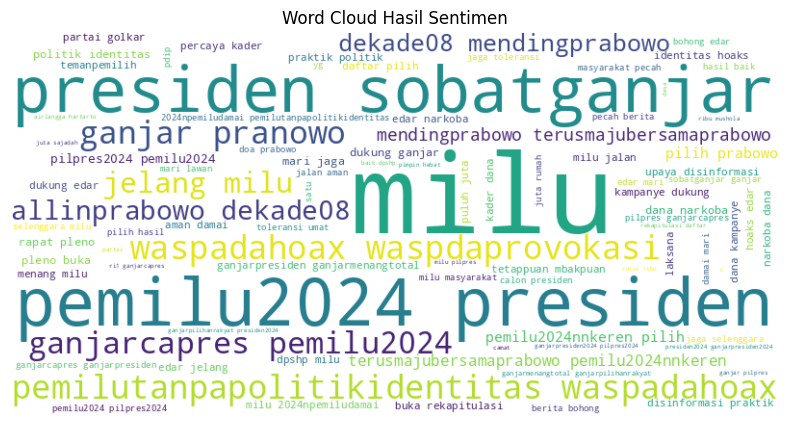

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Mengubah nilai NaN menjadi string kosong pada kolom "processed_text"
data['processed_text'] = data['processed_text'].fillna('')

# Menggabungkan semua teks hasil sentimen menjadi satu string
text = ' '.join(data['processed_text'])

# Membuat WordCloud dari teks
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Memberi judul pada WordCloud
plt.title('Word Cloud Hasil Sentimen')

# Menampilkan plot
plt.show()


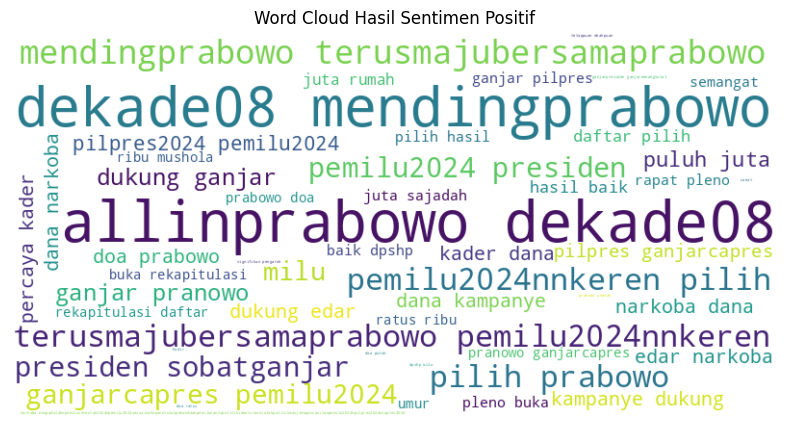

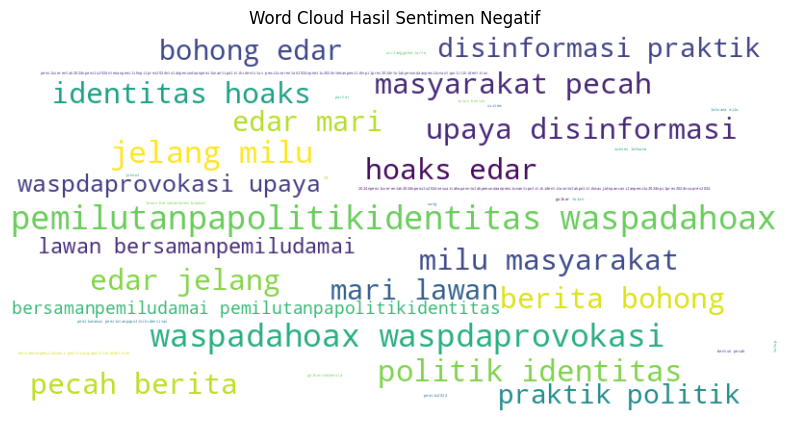

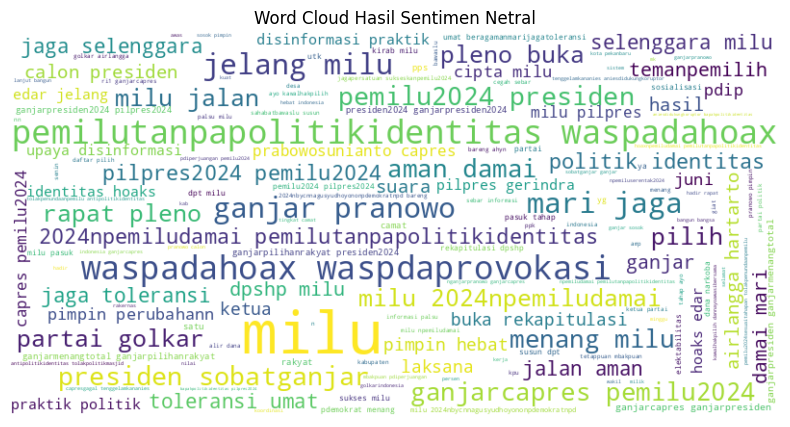

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Mengubah nilai NaN menjadi string kosong pada kolom "processed_text"
data['processed_text'] = data['processed_text'].fillna('')

# Memisahkan data berdasarkan kelas sentimen
positive_data = data[data['sentiment'] == 'positive']
negative_data = data[data['sentiment'] == 'negative']
neutral_data = data[data['sentiment'] == 'neutral']

# Menggabungkan semua teks hasil sentimen positif menjadi satu string
positive_text = ' '.join(positive_data['processed_text'])

# Menggabungkan semua teks hasil sentimen negatif menjadi satu string
negative_text = ' '.join(negative_data['processed_text'])

# Menggabungkan semua teks hasil sentimen netral menjadi satu string
neutral_text = ' '.join(neutral_data['processed_text'])

# Membuat WordCloud untuk sentimen positif
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Hasil Sentimen Positif')
plt.show()


# Membuat WordCloud untuk sentimen negatif
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Hasil Sentimen Negatif')
plt.show()

# Membuat WordCloud untuk sentimen netral
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
plt.figure(figsize=(10, 5))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Hasil Sentimen Netral')
plt.show()




In [ ]:
from collections import Counter
# Menghitung Frekuensi Kata
words = text.split()
word_counts = Counter(words)

# Menampilkan WordCount
for word, count in word_counts.most_common(10):
    print(f'{word}: {count}')

milu: 609
2024: 493
pemilu2024: 249
ganjar: 187
pilih: 186
prabowo: 170
presiden: 153
dukung: 127
politik: 102
ganjarcapres: 102


In [ ]:
from collections import Counter
# Menghitung Frekuensi Kata
words = positive_text .split()
word_counts = Counter(words)

# Menampilkan WordCount
for word, count in word_counts.most_common(10):
    print(f'{word}: {count}')

prabowo: 139
dukung: 127
pilih: 113
2024: 108
pemilu2024: 106
ganjar: 103
presiden: 74
milu: 71
allinprabowo: 69
dekade08: 69


In [ ]:
from collections import Counter
# Menghitung Frekuensi Kata
words = negative_text .split()
word_counts = Counter(words)

# Menampilkan WordCount
for word, count in word_counts.most_common(10):
    print(f'{word}: {count}')

milu: 45
edar: 42
2024: 34
pecah: 26
mari: 26
pemilutanpapolitikidentitas: 26
waspadahoax: 26
waspdaprovokasi: 26
politik: 25
jelang: 25


In [ ]:
from collections import Counter
# Menghitung Frekuensi Kata
words = neutral_text .split()
word_counts = Counter(words)

# Menampilkan WordCount
for word, count in word_counts.most_common(10):
    print(f'{word}: {count}')

milu: 493
2024: 351
pemilu2024: 138
ganjar: 84
presiden: 77
pilih: 72
politik: 72
partai: 70
jaga: 62
menang: 60


In [ ]:
"X = data["processed_text"]
y = data["sentiment_numeric"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Periksa dan ganti nilai np.nan
X_train = X_train.fillna("")  # Ganti dengan teks kosong
X_test = X_test.fillna("")  # Ganti dengan teks kosong

# Vektorisasi menggunakan TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)


Akurasi: 0.8855721393034826


In [ ]:
data["predicted_sentiment"] = np.nan  # Membuat kolom baru dengan nilai awal NaN
data.loc[:len(y_pred)-1, "predicted_sentiment"] = y_pred  # Menetapkan hasil prediksi pada subset yang sesuai

In [ ]:
import numpy as np

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data

,created_at,full_text,processed_text,sentiment,sentiment_numeric,predicted_sentiment
0,06/05/23,#PemiluSerentak2024\n#Pemilu2024SesuaiTahapan\...,pemiluserentak2024npemilu2024sesuaitahapanntol...,neutral,0,0.0
1,06/05/23,AHY Minta Demokat Wilayah Papua Selatan Tetap ...,ahy demokat wilayah papua selatan solid menang...,neutral,0,0.0
2,06/05/23,Hari ini @PDemokrat resmi mendaftar ke KPU. Di...,pdemokrat resmi daftar kpu milu 2024 lupa pili...,neutral,0,0.0
3,06/05/23,Mari kita jaga Penyelenggaraan Pemilu 2024 aga...,mari jaga selenggara milu 2024 jalan aman dama...,neutral,0,0.0
4,06/05/23,Mari kita jaga Penyelenggaraan Pemilu 2024 aga...,mari jaga selenggara milu 2024 jalan aman dama...,neutral,0,0.0
...,...,...,...,...,...,...
996,06/04/23,Ini Target Partai Golkar di Pemilu 2024 Raih 2...,target partai golkar milu 2024 raih 20 persen ...,neutral,0,NaN
997,06/04/23,@refaabdi Sukseskan pemilu 2024,refaabdi sukses milu 2024,neutral,0,NaN
998,06/04/23,@alextham878 Batalnya piala dunia U 20 di Indo...,alextham878 batal piala dunia u 20 indonesia s...,positive,1,NaN
999,06/04/23,(04/06)\n\nSelamat Hari Raya Waisak 2023 / 256...,0406nnselamat raya waisak 2023 2567 bennmoment...,neutral,0,NaN


In [ ]:
incorrect_indices = np.where(y_pred != y_test)[0]  # Get indices of misclassified instances
incorrect_data = data.loc[incorrect_indices]  # Get misclassified data

# Display misclassified data along with the actual sentiment
for index, row in incorrect_data.iterrows():
    print("Text:", row["full_text"])
    print("Predicted Sentiment:", row["predicted_sentiment"])
    print("Actual Sentiment:", row["sentiment"])
    print("------------------------")


Text: Hari ini @PDemokrat resmi mendaftar ke KPU. Di pemilu 2024 jangan lupa pilih Nomor 14..\nbjy\n\nPDemokrat\nAgusYudhoyono\nAHY Pimpin Perubahan\nhttps://t.co/kGz7AHjngr
Predicted Sentiment: neutral
Actual Sentiment: neutral
------------------------
Text: Waspadalah..!!\n\n#PemiluSerentak2024\n#Pemilu2024SesuaiTahapan\n#TolakPenundaanPemilu\n#AntiPolitikIdentitas\n#TolakPolitikMasjid\n#Pancasila\n#Pemilu2024\n#Pilpres2024\n#Capres2024\n#KPU\n#Bawaslu\n#IndonesiaMaju https://t.co/Pg9GkEdzzK
Predicted Sentiment: neutral
Actual Sentiment: neutral
------------------------
Text: Ciptakan Pemilu 2024 damai tanpa Hoax\n#PemiluDamai #PemiluTanpaPolitikIdentitas #WaspadaHoax #WaspdaProvokasi https://t.co/ZJ3yNAYz2Y
Predicted Sentiment: neutral
Actual Sentiment: neutral
------------------------
Text: Klaim bonus hingga $5.000 saat Anda daftar dan deposit di XM. Daftar dan nikmati kondisi trading terbaik pada forex saham &amp; lainnya. \n\nâœ…Tanpa ketentuan tersembunyi\nâœ…Profit dapat ditar

In [ ]:
selected_data = data[["processed_text","predicted_sentiment"]]
print(selected_data)

                                         processed_text predicted_sentiment
0     pemiluserentak2024npemilu2024sesuaitahapanntol...             neutral
1     ahy demokat wilayah papua selatan solid menang...             neutral
2     pdemokrat resmi daftar kpu milu 2024 lupa pili...             neutral
3     mari jaga selenggara milu 2024 jalan aman dama...             neutral
4     mari jaga selenggara milu 2024 jalan aman dama...             neutral
...                                                 ...                 ...
996   target partai golkar milu 2024 raih 20 persen ...                 NaN
997                           refaabdi sukses milu 2024                 NaN
998   alextham878 batal piala dunia u 20 indonesia s...                 NaN
999   0406nnselamat raya waisak 2023 2567 bennmoment...                 NaN
1000  siar persnkoalisi masyarakat sipil kawal milu ...                 NaN

[1001 rows x 2 columns]


In [ ]:

# Mengecek missing value dalam DataFrame
missing_values = data.isnull().sum()
print(missing_values)

created_at           0
full_text            0
processed_text       2
sentiment            0
sentiment_numeric    0
dtype: int64


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Remove rows with missing values
data = data.dropna(subset=['processed_text'])

# Fill missing values with a default value
data['processed_text'] = data['processed_text'].fillna('')

# Create an instance of CountVectorizer
cv = CountVectorizer(max_features=800)

# Vectorize words and store in variable X (predictor)
X = cv.fit_transform(data["processed_text"]).toarray()
y = (data["sentiment"])

# Predictor
print(X)

# X size
print(X.shape)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(999, 800)


In [ ]:
# train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:


# Naive Bayes Classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Fitting and predicting
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

# Accuracy scores
print("Gaussian", accuracy_score(y_test, y_pred_gnb))
print("Multinomial", accuracy_score(y_test, y_pred_mnb))
print("Bernoulli", accuracy_score(y_test, y_pred_bnb))


Gaussian 0.84
Multinomial 0.915
Bernoulli 0.87


In [ ]:
# Fitting and predicting
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_gnb)
print("Accuracy:", accuracy)

# Calculate the number of misclassified samples
misclassified = (y_test != y_pred_mnb).sum()
print("Misclassified samples:", misclassified)

Accuracy: 0.915
Misclassified samples: 17


In [ ]:
import pandas as pd

# Create a DataFrame for the test subset
X_test_df = pd.DataFrame(X_test, columns=[f"feature_{i+1}" for i in range(X_test.shape[1])], index=data.index[X_train.shape[0]:])

# Create a new column 'Sentiment_Predicted' in the DataFrame for the test subset
data['Sentiment_Predicted'] = ''
data.loc[X_test_df.index, 'Sentiment_Predicted'] = y_pred_mnb

# Display the DataFrame with the predicted sentiment column
print(data)


     created_at                                          full_text  \
0      06/05/23  #PemiluSerentak2024\n#Pemilu2024SesuaiTahapan\...   
1      06/05/23  AHY Minta Demokat Wilayah Papua Selatan Tetap ...   
2      06/05/23  Hari ini @PDemokrat resmi mendaftar ke KPU. Di...   
3      06/05/23  Mari kita jaga Penyelenggaraan Pemilu 2024 aga...   
4      06/05/23  Mari kita jaga Penyelenggaraan Pemilu 2024 aga...   
...         ...                                                ...   
996    06/04/23  Ini Target Partai Golkar di Pemilu 2024 Raih 2...   
997    06/04/23                    @refaabdi Sukseskan pemilu 2024   
998    06/04/23  @alextham878 Batalnya piala dunia U 20 di Indo...   
999    06/04/23  (04/06)\n\nSelamat Hari Raya Waisak 2023 / 256...   
1000   06/04/23  SIARAN PERS\nKoalisi Masyarakat Sipil Kawal Pe...   

                                         processed_text sentiment  \
0     pemiluserentak2024npemilu2024sesuaitahapanntol...   neutral   
1     ahy demokat wil

In [ ]:
# Select the desired columns for display
columns_to_display = ['processed_text', 'sentiment', 'Sentiment_Predicted']

# Create a new DataFrame with selected columns
display_data = data.loc[:, columns_to_display]

# Display the new DataFrame
print(display_data)


                                         processed_text sentiment  \
0     pemiluserentak2024npemilu2024sesuaitahapanntol...   neutral   
1     ahy demokat wilayah papua selatan solid menang...   neutral   
2     pdemokrat resmi daftar kpu milu 2024 lupa pili...   neutral   
3     mari jaga selenggara milu 2024 jalan aman dama...   neutral   
4     mari jaga selenggara milu 2024 jalan aman dama...   neutral   
...                                                 ...       ...   
996   target partai golkar milu 2024 raih 20 persen ...   neutral   
997                           refaabdi sukses milu 2024   neutral   
998   alextham878 batal piala dunia u 20 indonesia s...  positive   
999   0406nnselamat raya waisak 2023 2567 bennmoment...   neutral   
1000  siar persnkoalisi masyarakat sipil kawal milu ...   neutral   

     Sentiment_Predicted  
0                         
1                         
2                         
3                         
4                         
...      

In [ ]:
# Menyimpan dataframe ke dalam file CSV
display_data.to_csv('output.csv', index=False)